# Data Science Regresssion Project:        Pridicting Home Price

In [1]:
#Dataset is taken from : https://www.kaggle.com/datasets/bandhansingh/banglore-house-price-data?resource=download

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

# Load Data into Dataframe

In [6]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df1.shape

(13320, 9)

In [8]:
df1.groupby('area_type')['area_type'].agg('count')


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df2= df1.drop(['area_type','society','availability','balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Droping null values

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3= df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## Adding new column BHK(Bedrooms Hall Kitchen) from coulmn size

In [13]:
df3['BHK']= df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.loc[648]

C:\Users\logan\AppData\Local\Temp\ipykernel_11668\3718359677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']= df3['size'].apply(lambda x: int(x.split(' ')[0]))


location        Arekere
size          9 Bedroom
total_sqft    4125Perch
bath                9.0
price             265.0
BHK                   9
Name: 648, dtype: object

In [14]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

##  Inspecting total_sqft column

In [35]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [36]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


#### We can find that the column total_sqft is unstructured. Average of range is taken for values like (1042 - 1105), the values with Sq. Meter is converted to Sq. ft

In [37]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [38]:
df4= df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [39]:
df4.loc[137]

location      8th Phase JP Nagar
size                       2 BHK
total_sqft                1073.5
bath                         2.0
price                     54.005
BHK                            2
Name: 137, dtype: object

In [40]:
(1105+1042)/2

1073.5

In [41]:
df5= df4.drop(['size'],axis='columns')
df5.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


## Introducing new column Price per Sq. ft

In [42]:
df6= df5.copy()
df6['Price_per_sqft']= df6['price']*100000/df6['total_sqft']
df6.head()

,location,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [43]:
len(df6['location'].unique())

1298

# Apply Dimentionality reduction to reduce number of locations

In [44]:
df6.location= df6.location.apply(lambda x: x.strip())
location_stat= df6.groupby('location')['location'].agg('count').sort_values(ascending= False)
location_stat


location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [45]:
len(location_stat[location_stat<=10])

1047

In [46]:
len(location_stat[location_stat>10])

240

### From above we can observe that the locations with less than 10 data points are 1047. We can reduce it and and merge these into single location as "others", this will help us to have fewer dummy columns in future.

In [47]:
location_stat_less_than_10=location_stat[location_stat<=10]
location_stat_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [76]:
df6['location']= df6['location'].apply(lambda x: 'other' if x in location_stat_less_than_10 else x)
df6.head(15)

,location,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [77]:
len(df6.location.unique())

241

## Outlier Removal 

### Considering standard house with one bedroom can have total area not less than 300 Sq. ft. 

In [87]:
df6[df6.total_sqft/df6.BHK<300].head()

,location,total_sqft,bath,price,BHK,Price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


### In above table we can see in "HSR Layout" has total area of 600 Sq.ft with 8 bedrooms. These kind of data points doesnt make any sense. These points need to be removed.   

In [86]:
df6.shape

(13200, 6)

In [88]:
df7= df6[~(df6.total_sqft/df6.BHK<300)]
len(df7)

12456

In [52]:
df7.Price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_sqft, dtype: float64

In [53]:
def remove_pps_outliers(df):
    df_out= pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.Price_per_sqft)
        st= np.std(subdf.Price_per_sqft)
        reduced_df= subdf[(subdf.Price_per_sqft > (m-st)) & (subdf.Price_per_sqft <= (m+st))]
        df_out= pd.concat([df_out,reduced_df], ignore_index= True)
    return df_out


In [54]:
df8= remove_pps_outliers(df7)
df8.shape

(10242, 6)

### Comparision of 2BHK and 3BHK based on price VS total area 

In [90]:
def plot_scatter(df,location):
    bhk2= df[(df.location==location) & (df.BHK==2)]
    bhk3= df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']= (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label= '2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='^',color='red',label= '3 BHK',s=50)
    plt.xlabel("total SQFT AREA")
    plt.ylabel("Price(INR)")
    plt.title(location)
    plt.legend()

    
 

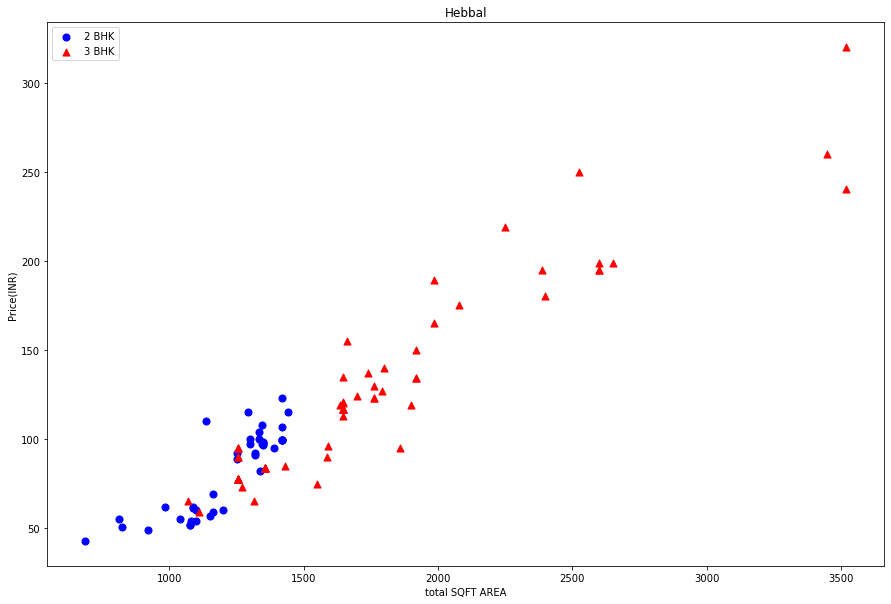

In [91]:
 plot_scatter(df8,"Hebbal")  

#### Above we can observe some properties from same location have 3 bedroom apartment is less than 2 bedroom apartment for same area. We also need to remove those locations with 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment. 

In [57]:
def remove_bhk_outliners(df):
    exclude_indices= np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stat= {}
        for BHK, bhk_df in location_df.groupby('BHK'):
            bhk_stat[BHK]={
                'mean': np.mean(bhk_df.Price_per_sqft),
                'std': np.std(bhk_df.Price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for BHK, bhk_df in location_df.groupby('BHK'):
            stat= bhk_stat.get(BHK-1)
            if stat and stat['count']>5:
                exclude_indices= np.append(exclude_indices,bhk_df[bhk_df.Price_per_sqft<(stat['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
            

In [58]:
df9 = remove_bhk_outliners(df8)
df9.shape

(7317, 6)

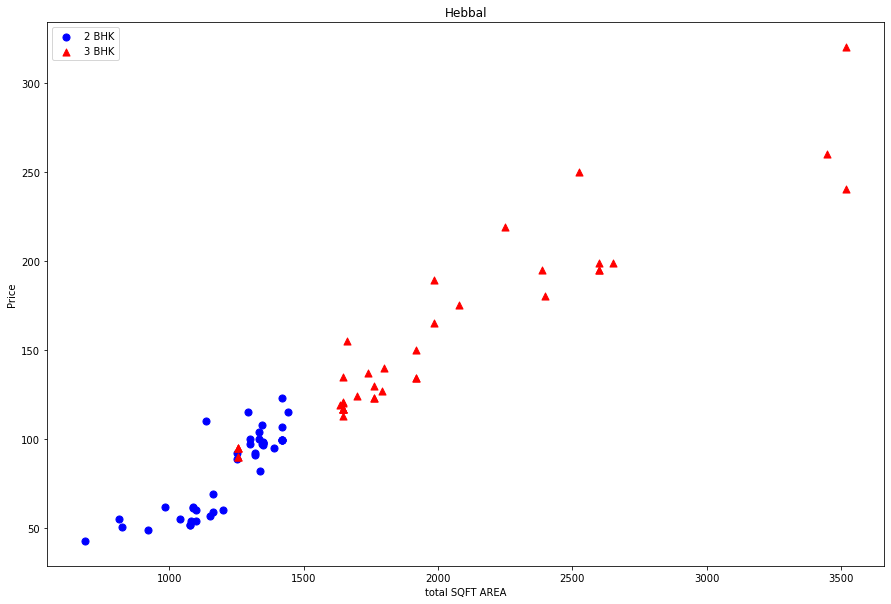

In [59]:
 plot_scatter(df9,"Hebbal") 

Text(0, 0.5, 'Count')

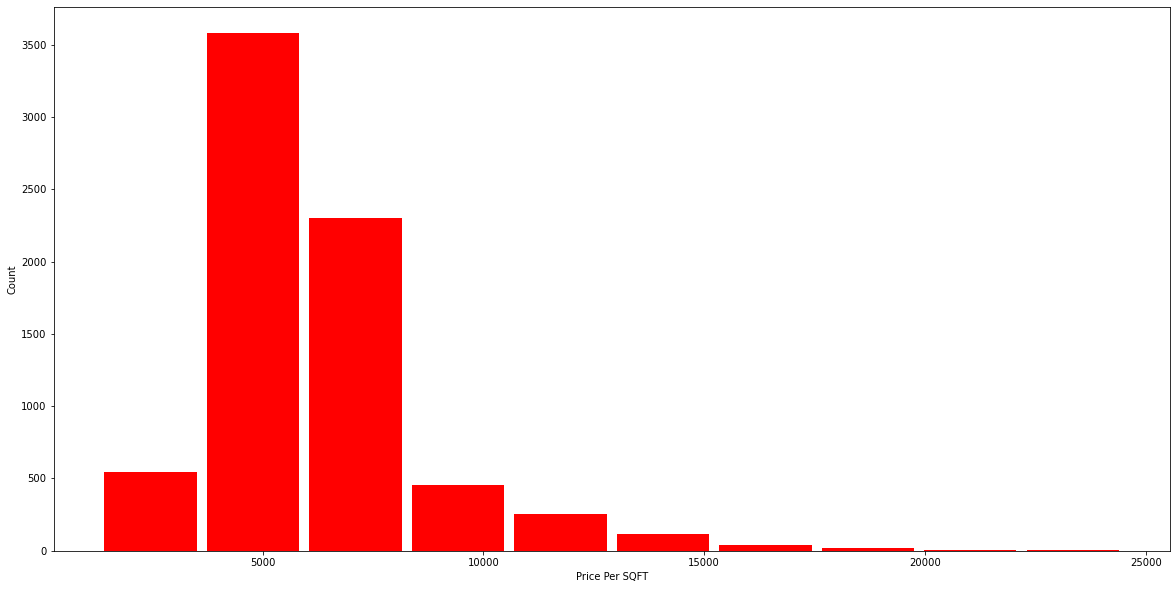

In [60]:
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)
plt.hist(df9.Price_per_sqft, rwidth=0.9, color= 'Red')
plt.xlabel("Price Per SQFT")
plt.ylabel("Count")

## Outlier Removal based on number of bathrooms  

In [94]:
df9[df9.bath>df9.BHK+2]

,location,total_sqft,bath,price,BHK,Price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8408,other,11338.0,9.0,1000.0,6,8819.897689


### It is unusual to have 2 extra bathrooms than number of bedrooms. 

In [61]:
df10= df9[(df9.bath<df9.BHK+2)]
df10.head()

,location,total_sqft,bath,price,BHK,Price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [62]:
df11= df10.drop(['Price_per_sqft'], axis= 'columns')

In [63]:
df11.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Implementation of One Hot Encoding for location 

In [64]:
dummies = pd.get_dummies(df11.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df12= pd.concat([df11,dummies.drop('other',axis = 'columns')],axis = 'columns')
df12.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df13= df12.drop('location',axis= 'columns')
df13.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df13.shape

(7239, 244)

## Builing Model 

In [68]:
X= df13.drop('price',axis= 'columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
y= df13.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 10)

In [71]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.8629132245229443

## Used K Fold cross validation to measure accuracy of our LinearRegression model 

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits= 5, test_size = 0.2, random_state= 0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

## Using Hyper parameter tuning to find if there is any other model with better score than linear regression 

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model(X,y):
    algos= {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                'normalize':[True, False]
            }
        },
        'lasso': {
            'model':Lasso(),
            'params': {
                'alpha':[1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size = 0.2, random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'], cv=cv, return_train_score= False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model(X,y)


S:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
S:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardSca

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726837,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.715413,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


# Testing the model

In [74]:
def predict_price(location, total_sqft, bath, BHK):
    loc_index = np.where(X.columns==location)[0][0]
    
    x= np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1]= bath
    x[2]= BHK
    if loc_index>=0:
        x[loc_index]=1
    
    return lr.predict([x])[0]

In [75]:
predict_price('Whitefield', 2770, 4, 3)

S:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


201.46692771552603

In [99]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

S:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86570258312184

In [105]:
predict_price('1st Block Jayanagar',2850.0, 4, 4)

S:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


355.0318239385856

In [104]:
df11.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
